<a href="https://colab.research.google.com/github/endangrusiana123/SLO/blob/main/KNN_cat_and_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#load dataset

In [1]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [2]:
# Download the dataset
!kaggle datasets download -d tongpython/cat-and-dog

# Unzip the downloaded dataset
!unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

#import library

In [3]:
from skimage.feature import hog
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import image as mping
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#image featuring technique

image:  (292, 269, 3)


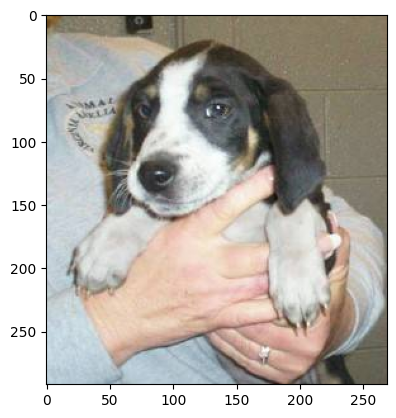

In [4]:
img = np.array(mping.imread('/content/training_set/training_set/dogs/dog.10.jpg'))
img.setflags(write=2)
print('image: ', img.shape)
plt.imshow(img)
plt.show()

#resize image

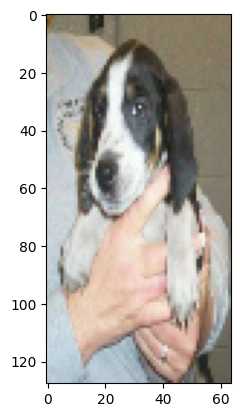

(128, 64, 3)


In [5]:
resized_img = cv2.resize(img, (64, 128))
plt.imshow(resized_img)
plt.show()
print(resized_img.shape)

#HOG features

(6804,)
[0.12279965 0.08989985 0.06837866 ... 0.00544733 0.09212347 0.08445901]
(128, 64)


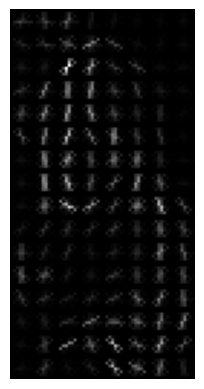

In [6]:
from skimage.feature import hog
import matplotlib.pyplot as plt

# Compute HOG features and visualization
fd, hog_image = hog(resized_img, visualize=True, channel_axis=-1)

# Print the feature descriptor and its shape
print(fd.shape)
print(fd)

# Print the shape of the HOG image
print(hog_image.shape)

# Plot the HOG image
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()


#add augmentation

In [7]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg

datagen = ImageDataGenerator(
    #rescale = 1./255,
    #zoom_range = [0.5,1],
    #rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    #shear_range = 0.2,
    horizontal_flip = True,
    #vertical_flip = True,
    fill_mode = 'nearest',
)

In [8]:
def augment_and_extract_hog(image_path, datagen, target_size=(64, 32), augmentations=5):
    img = mpimg.imread(image_path)
    img = np.array(img, dtype=np.float32)

    # Resize the image to the target size
    resized_img = cv2.resize(img, target_size)

    # Prepare an empty list to hold the augmented images' HOG features
    augmented_hog_features = []

    # Expand dimensions to create a batch of 1 image
    img_batch = np.expand_dims(resized_img, axis=0)

    # Generate augmented images
    for _ in range(augmentations):
        for augmented_img in datagen.flow(img_batch, batch_size=1):
            # Convert augmented image back to array and resize if necessary
            augmented_img = augmented_img[0]

            # Extract HOG features from the augmented image
            fd = hog(augmented_img, channel_axis=-1)

            # Append HOG features to the list
            augmented_hog_features.append(fd)

            # Break after getting the required number of augmentations
            if len(augmented_hog_features) >= augmentations:
                break

    return augmented_hog_features


#train dataset

In [9]:
# Augment and extract HOG features for dogs
data_dogs = []
for entry in glob.glob('/content/training_set/training_set/dogs/*.jpg'):
    augmented_hog_features = augment_and_extract_hog(entry, datagen)
    data_dogs.extend(augmented_hog_features)

# Augment and extract HOG features for cats
data_cats = []
for entry in glob.glob('/content/training_set/training_set/cats/*.jpg'):
    augmented_hog_features = augment_and_extract_hog(entry, datagen)
    data_cats.extend(augmented_hog_features)

# Combine train data
train_data = data_cats + data_dogs
print(len(train_data))

72045


#train data labeling

In [10]:
train_lable_list = []
#append lable cats
for i in range(len(data_cats)):
  train_lable_list.append('cat')
print(train_lable_list)
print(len(train_lable_list))

#append lable dogs
for i in range(len(data_dogs)):
  train_lable_list.append('dog')
print(train_lable_list)
print(len(train_lable_list))

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat'

#test dataset

In [11]:
#dogs test data
test_dogs = []
for entry in glob.glob('/content/test_set/test_set/dogs/*.jpg'):
  img = np.array(mping.imread(entry))
  resized_img = cv2.resize(img, (64, 32))
  fd = hog(resized_img, channel_axis=-1)
  test_dict = {'data':fd, 'lable':'dog'}
  test_dogs.append(test_dict)

#cats tes data
test_cats = []
for entry in glob.glob('/content/test_set/test_set/cats/*.jpg'):
  img = np.array(mping.imread(entry))
  resized_img = cv2.resize(img, (64, 32))
  fd = hog(resized_img, channel_axis=-1)
  test_dict = {'data':fd, 'lable':'cat'}
  test_dogs.append(test_dict)

#combine test data
test_data = test_cats + test_dogs
print(len(test_data))

2023


#separating data and lables to different list

In [12]:
test_features = []
test_lables = []
for i in test_data:
  test_lables.append(i['lable'])
  test_features.append(i['data'])
print(len(test_features))
print(test_lables)

2023
['dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 

#KNN implementation

In [13]:
x_axis_k_points = []

f1_euclidean = []
accuracies_euclidean = []
conf_matrix_euclidean = []

for k in range(7):
  #KNN train data
  knn_euclidean = KNeighborsClassifier(n_neighbors=k+1)
  knn_euclidean.fit(train_data, train_lable_list)

  #KNN prediction
  pred_lables_euclidean = knn_euclidean.predict(test_features)

  #accuracy of prediction
  acc_euclidean = knn_euclidean.score(test_features, test_lables)
  accuracies_euclidean.append(acc_euclidean)

  #confusion matrix of prediction
  conf_matrix_euclidean.append(metrics.confusion_matrix(test_lables, pred_lables_euclidean))

  #f1 score of prediction
  f1_euclidean.append(metrics.f1_score(test_lables, pred_lables_euclidean, pos_label='dog'))

  x_axis_k_points.append(k+1)

#scores

FOR k= 1 , f1 score:  0.6699999999999998 , accuracy:  0.6085022244191794 , 
confusion matrix:
 [[427 584]
 [208 804]]
Test Image: 2023


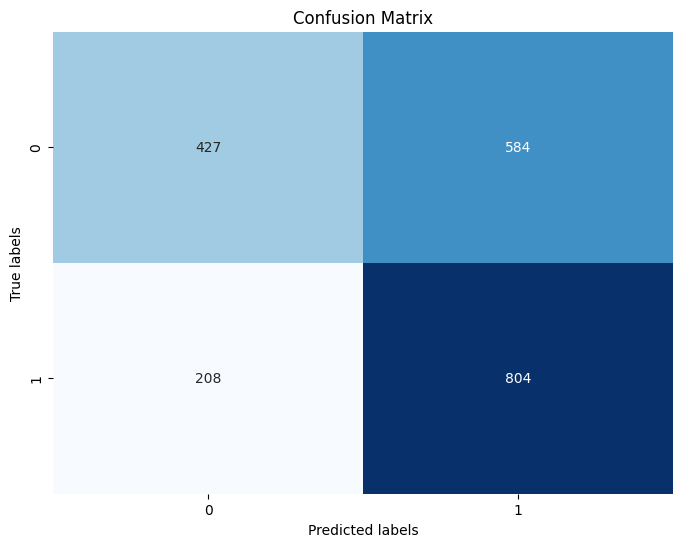

Accuracy: 0.6085022244191794
Sensitivity: 0.7944664031620553
Specificity: 0.42235410484668645
F1 Score: 0.6699999999999998


FOR k= 2 , f1 score:  0.6442630820931348 , accuracy:  0.6337123084527929 , 
confusion matrix:
 [[611 400]
 [341 671]]
Test Image: 2023


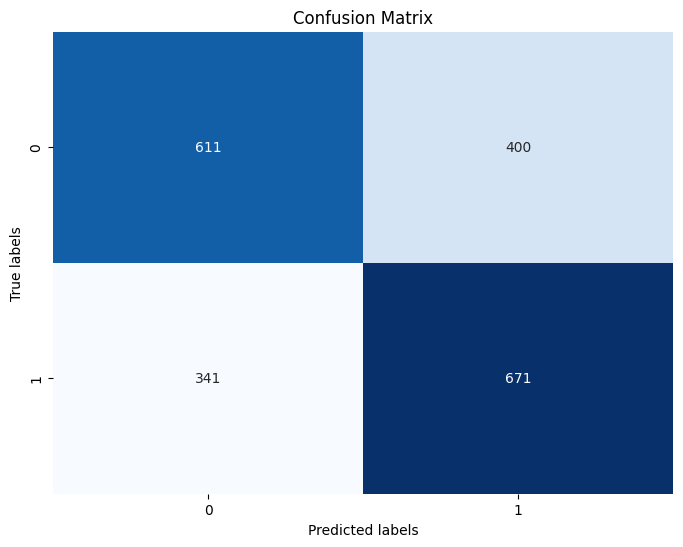

Accuracy: 0.6337123084527929
Sensitivity: 0.6630434782608695
Specificity: 0.6043521266073195
F1 Score: 0.6442630820931348


FOR k= 3 , f1 score:  0.701853344077357 , accuracy:  0.634206623826001 , 
confusion matrix:
 [[412 599]
 [141 871]]
Test Image: 2023


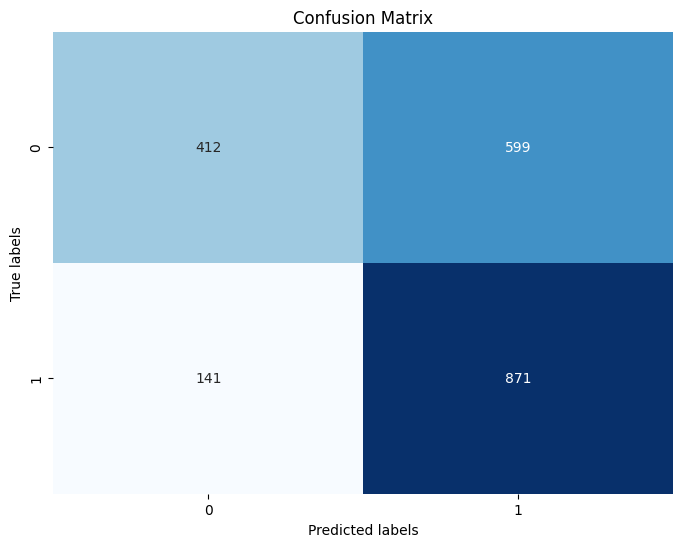

Accuracy: 0.634206623826001
Sensitivity: 0.8606719367588933
Specificity: 0.4075173095944609
F1 Score: 0.701853344077357


FOR k= 4 , f1 score:  0.6980802792321117 , accuracy:  0.6579337617399901 , 
confusion matrix:
 [[531 480]
 [212 800]]
Test Image: 2023


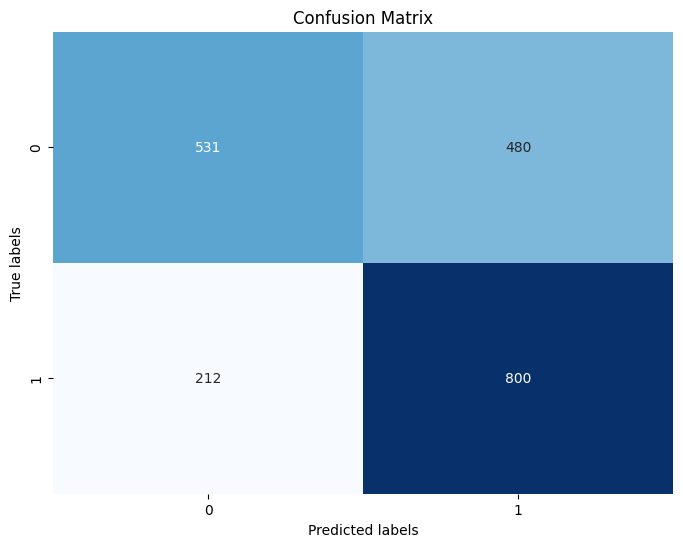

Accuracy: 0.6579337617399901
Sensitivity: 0.7905138339920948
Specificity: 0.5252225519287834
F1 Score: 0.6980802792321117


FOR k= 5 , f1 score:  0.7119715527459501 , accuracy:  0.6396440929312902 , 
confusion matrix:
 [[393 618]
 [111 901]]
Test Image: 2023


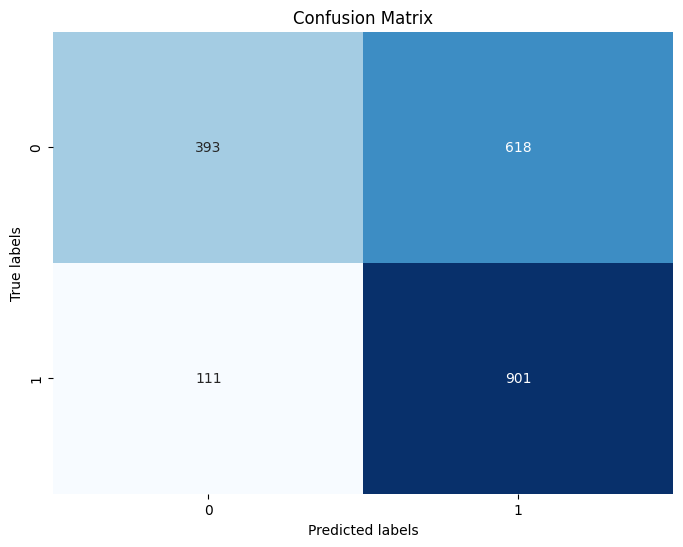

Accuracy: 0.6396440929312902
Sensitivity: 0.8903162055335968
Specificity: 0.3887240356083086
F1 Score: 0.7119715527459501


FOR k= 6 , f1 score:  0.7056384742951907 , accuracy:  0.6490360850222442 , 
confusion matrix:
 [[462 549]
 [161 851]]
Test Image: 2023


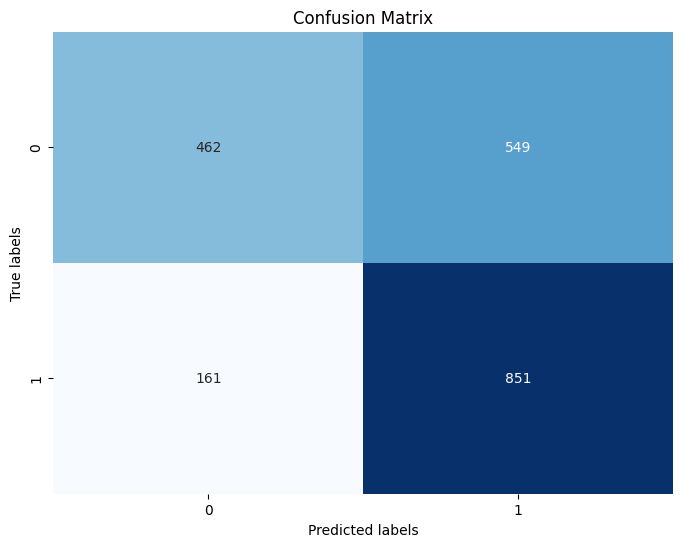

Accuracy: 0.6490360850222442
Sensitivity: 0.8409090909090909
Specificity: 0.456973293768546
F1 Score: 0.7056384742951907


FOR k= 7 , f1 score:  0.7130097087378641 , accuracy:  0.6347009391992091 , 
confusion matrix:
 [[366 645]
 [ 94 918]]
Test Image: 2023


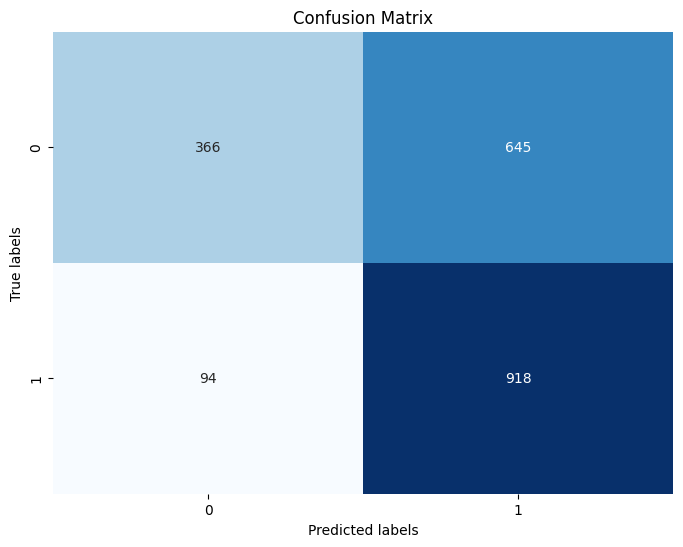

Accuracy: 0.6347009391992091
Sensitivity: 0.9071146245059288
Specificity: 0.3620178041543027
F1 Score: 0.7130097087378641




In [14]:
import seaborn as sns

for i in range(len(f1_euclidean)):
  print('FOR k=', i+1,', f1 score: ', f1_euclidean[i], ', accuracy: ', accuracies_euclidean[i], ', \nconfusion matrix:\n', conf_matrix_euclidean[i])

  # Compute accuracy
  accuracy = accuracies_euclidean[i]

  # Compute confusion matrix
  cm = conf_matrix_euclidean[i]

  # Compute sensitivity and specificity
  true_negatives = cm[0, 0]
  false_negatives = cm[1, 0]
  true_positives = cm[1, 1]
  false_positives = cm[0, 1]

  sensitivity = true_positives / (true_positives + false_negatives)
  specificity = true_negatives / (true_negatives + false_positives)

  # Compute F1 score
  f1 = f1_euclidean[i]

  print("Test Image:",len(test_lables))
  # Plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

  print("Accuracy:", accuracy)
  print("Sensitivity:", sensitivity)
  print("Specificity:", specificity)
  print("F1 Score:", f1)
  print('\n')

#plotting scores

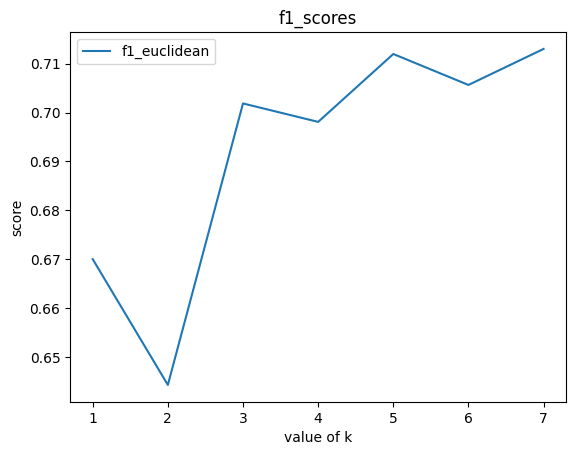

In [15]:
plt.plot(x_axis_k_points, f1_euclidean, label='f1_euclidean')
plt.title('f1_scores')
plt.xlabel('value of k')
plt.ylabel('score')
plt.legend()
plt.show()

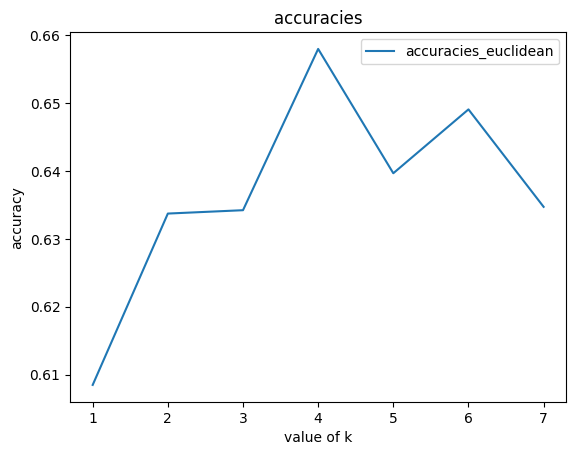

In [16]:
plt.plot(x_axis_k_points, accuracies_euclidean, label='accuracies_euclidean')
plt.title('accuracies')
plt.xlabel('value of k')
plt.ylabel('accuracy')
plt.legend()
plt.show()